为了能够更加方便测试数据集合，比较各个算法模型的优劣，构建一个竞技场。目前主要支持4个平台的测试：

- arsenal
- sklearn
- spark mllib
- tensorflow

本文用各种算法来模拟曲线。这里有篇文章有通俗的理论证明，真的不错。

![](第四章_神经网络可以拟合任何函数的可视化证明.md）


In [1]:
import os
index = os.getcwd().rfind("/notebook")
if index > 0: os.chdir(os.getcwd()[:index])

In [2]:
# Package imports
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

import eipi10.ml.neural_network as nn
import eipi10.ml.linear_model as lm
from eipi10.ml.planar_utils import *
from eipi10.ml.utils import *
from eipi10.test.testCases_v2 import *
from eipi10.ml.predictor import ClassificationPredictor, Predictor
import logging

%matplotlib inline

# 1. 数据

train_X_orig.shape=(1, 150)
train_Y_orig.shape=(1, 150)
test_X_orig.shape=(1, 50)
test_Y_orig.shape=(1, 50)


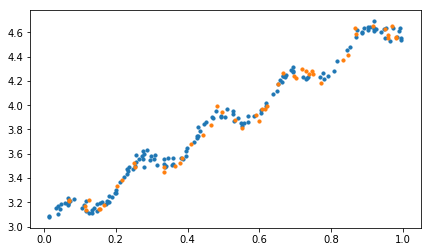

In [3]:
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

train_X_orig, train_Y_orig, test_X_orig, test_Y_orig = load_sin_line_dataset("./data/sin_line.txt")
print("train_X_orig.shape={}".format(train_X_orig.shape))
print("train_Y_orig.shape={}".format(train_Y_orig.shape))
print("test_X_orig.shape={}".format(test_X_orig.shape))
print("test_Y_orig.shape={}".format(test_Y_orig.shape))

# Visualize train data
plt.scatter(train_X_orig.T, train_Y_orig.T, c='C0', s=10, cmap=plt.cm.Spectral)
plt.scatter(test_X_orig.T, test_Y_orig.T, c='C1', s=10, cmap=plt.cm.Spectral)

# 2. arsenal 

## 2.1 Linear Regression


- 即使degree=100, 看上去多项式线性回归无法拟合曲线，问题在哪里？

    

INFO: Cost after epoch 0: 7.3758812212


train_X.shape=(50, 150)
train_Y.shape=(1, 150)
test_X.shape=(50, 50)
test_Y.shape=(1, 50)


INFO: Cost after epoch 100: 0.0031587951
INFO: Cost after epoch 200: 0.0030496017
INFO: Cost after epoch 300: 0.0029886336
INFO: Cost after epoch 400: 0.0029456895
INFO: Cost after epoch 500: 0.0029143589
INFO: Cost after epoch 600: 0.0028910945
INFO: Cost after epoch 700: 0.0028734906
INFO: Cost after epoch 800: 0.0028598798
INFO: Cost after epoch 900: 0.0028491033
INFO: Final Cost after epoch 1000: 0.0028403545


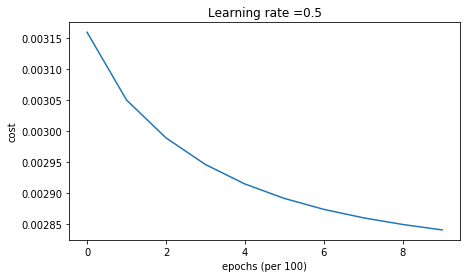

train cost=0.0028403544629829786
test cost=0.0035213696355349882
W=[[  1.34636249e+00   4.51726102e-01   7.95101197e-02  -4.50433027e-02
   -7.08504383e-02  -6.13891856e-02  -4.19973228e-02  -2.24643233e-02
   -6.25174657e-03   5.78504715e-03   1.38461190e-02   1.85184195e-02
    2.04830468e-02   2.03895669e-02   1.88068349e-02   1.62092540e-02
    1.29792012e-02   9.41634447e-03   5.74932519e-03   2.14760260e-03
   -1.26756770e-03  -4.41344945e-03  -7.23754951e-03  -9.71070442e-03
   -1.18214070e-02  -1.35712200e-02  -1.49711175e-02  -1.60386036e-02
   -1.67954716e-02  -1.72660844e-02  -1.74760749e-02  -1.74513807e-02
   -1.72175426e-02  -1.67992098e-02  -1.62198041e-02  -1.55013069e-02
   -1.46641388e-02  -1.37271078e-02  -1.27074083e-02  -1.16206568e-02
   -1.04809519e-02  -9.30095207e-03  -8.09196256e-03  -6.86402880e-03
   -5.62603096e-03  -4.38577808e-03  -3.15009964e-03  -1.92493329e-03
   -7.15408016e-04   4.74077868e-04]]
b=[[ 3.05909276]]
equation.W=[[ -7.37443172e+03   1.440

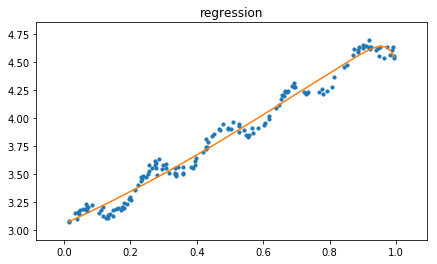

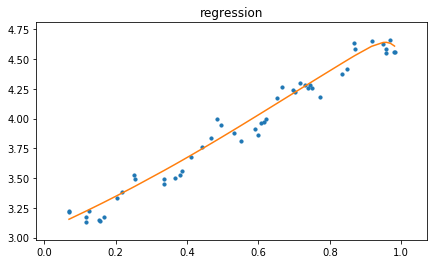

In [4]:
reload(lm)

train_X, train_Y, test_X, test_Y =  (train_X_orig, train_Y_orig, test_X_orig, test_Y_orig)
degree = 50
train_X = map_feature(train_X, degree)
test_X = map_feature(test_X, degree)

print("train_X.shape={}".format(train_X.shape))
print("train_Y.shape={}".format(train_Y.shape))
print("test_X.shape={}".format(test_X.shape))
print("test_Y.shape={}".format(test_Y.shape))

model = lm.LinearRegression(num_features=train_X.shape[0],
                            regularizer=L2Regularizer(0), iterator=NumberIterator(1000),
                            optimizer=GradientOptimizer(0.5), initializer=WeightInitializer(),
                            keep_cost_num_epoch=100)

model.fit(train_X, train_Y, print_cost=True, print_num_epoch=100)
model.plot_costs(costs=model.costs[1:])

print('train cost={}'.format(model.get_cost(train_X, train_Y)))
print('test cost={}'.format(model.get_cost(test_X, test_Y)))
print('W={}'.format(model.W))
print('b={}'.format(model.b))

W, b = lm.LinearRegression.normal_equation(train_X, train_Y)
print('equation.W={}'.format(W))
print('equation.b={}'.format(b))

# model.W = W
# model.b = b


predictor = Predictor(model)
predictor.plot_regression_curve(train_X_orig, train_Y_orig, X_model=train_X)
predictor.plot_regression_curve(test_X_orig, test_Y_orig, X_model=test_X)

## 2.2 神经网络

- 神经网络也不容易模拟，非常奇怪
- 增加了learning_rate， epoch_times，设置mini_batch后，基本能完美拟合。
learning_rate = 0.1

#batch
epoch_times = 5000
mini_batch = 50

- 感觉神经网络这些超参数是相互影响的，比如如果增加网络的深度，学习率就要发生变化。
- 当设置了mini_batch后，模型的效果有时候会明显变好一些，这或许是增加了随机性，容易跳出局部的最小值。

### Round 1

Step 1
* learning rate($\alpha$) 

Step 2
* $\beta $ for momentum. 0.9 is default  : 直接使用Adam了
* mini-batch size: 
* hidden units：  

Step 3
* layers  
* learning rate decay：   alpha = 0.01， mini_batch=100       
* $\beta 1,  \beta 2, \epsilon$ for Adam

* 增加样本个数 



In [5]:

learning_rate = 0.1

#batch
epoch_times = 5000
mini_batch = 50
print_num_epoch = 200
keep_cost_num_epoch = 200

#initialize
static_weight_scale=10

#regularize
alpha = 0.0
keep_prob = 1

#optimize
beta=0.9
beta1=0.9
beta2=0.99
epsilon=1e-8

train_X, train_Y, test_X, test_Y =  (train_X_orig, train_Y_orig, test_X_orig, test_Y_orig)

# train_X = map_feature(train_X, 5)  #如果增加变量，模型在2000次迭代后就能取得不错效果。
# test_X = map_feature(test_X, 5)

num_neurons=[train_X.shape[0], 32, 8, 1]
activators=[Tanh, Tanh, Linear]

INFO: Cost after epoch 0: 0.5440117115
INFO: Cost after epoch 200: 0.0083203795
INFO: Cost after epoch 400: 0.0021469713
INFO: Cost after epoch 600: 0.0029068064
INFO: Cost after epoch 800: 0.0020954484
INFO: Cost after epoch 1000: 0.0028733694
INFO: Cost after epoch 1200: 0.0083582721
INFO: Cost after epoch 1400: 0.0035276300
INFO: Cost after epoch 1600: 0.0017578874
INFO: Cost after epoch 1800: 0.0016531239
INFO: Cost after epoch 2000: 0.0056496128
INFO: Cost after epoch 2200: 0.0020387307
INFO: Cost after epoch 2400: 0.0033088963
INFO: Cost after epoch 2600: 0.0017761444
INFO: Cost after epoch 2800: 0.0029000055
INFO: Cost after epoch 3000: 0.0013896800
INFO: Cost after epoch 3200: 0.0016767727
INFO: Cost after epoch 3400: 0.0031530562
INFO: Cost after epoch 3600: 0.0042247237
INFO: Cost after epoch 3800: 0.0020014593
INFO: Cost after epoch 4000: 0.0040247776
INFO: Cost after epoch 4200: 0.0008165737
INFO: Cost after epoch 4400: 0.0015653215
INFO: Cost after epoch 4600: 0.0008425708

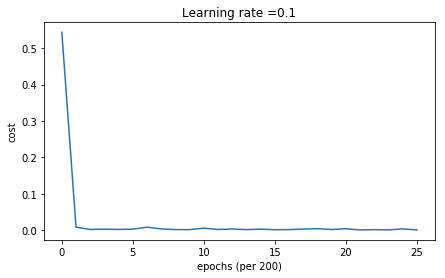

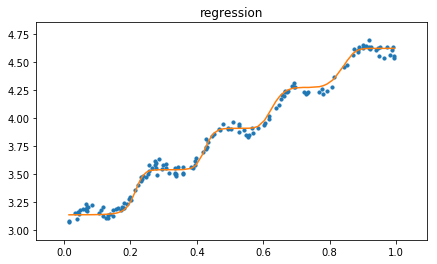

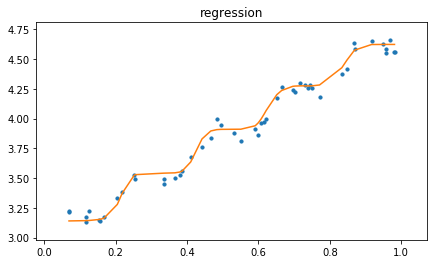

In [6]:
reload(nn)
model = nn.NeuralNetwork.build(
    num_neurons=num_neurons,
    activators=activators,      
    iterator=NumberIterator(epoch_times),
    initializer=HeWeightInitializer(),
    optimizer=nn.AdamOptimizer(learning_rate=learning_rate, beta1=beta1, beta2=beta2, epsilon=epsilon),
#     optimizer=GradientOptimizer(learning_rate=learning_rate),  #太慢了。
    keep_cost_num_epoch=keep_cost_num_epoch,
    mini_batch=mini_batch,
    regularizer=nn.L2Regularizer(alpha) ,
    keep_prob=keep_prob,
    cost_object=MeanSquaredError
)

model.fit(train_X, train_Y,  print_cost=True, print_num_epoch=print_num_epoch)
model.plot_costs()

predictor = Predictor(model)
predictor.plot_regression_curve(train_X_orig, train_Y_orig, X_model=train_X)
predictor.plot_regression_curve(test_X_orig, test_Y_orig, X_model=test_X)


# 3. sklearn

##  3.1 Logistic Regression 

参见http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [7]:
from sklearn import linear_model
from sklearn import neighbors

train_X, train_Y, test_X, test_Y =  (train_X_orig, train_Y_orig, test_X_orig, test_Y_orig)
degree=1
train_X = map_feature(train_X, degree)
test_X = map_feature(test_X, degree)

model = linear_model.LogisticRegression(C=0.01, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=50000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

logistic = model.fit(train_X.T, np.ravel(train_Y))
print(model.score(train_X.T, np.ravel(train_Y)))
print(model.score(test_X.T, np.ravel(test_Y)))


ValueError: Unknown label type: 'continuous'

knn = neighbors.KNeighborsClassifier()
knn = knn.fit(train_set_x.T, np.ravel(train_set_y))
print(knn.score(train_set_x.T, np.ravel(train_set_y)))
print(knn.score(test_set_x.T, np.ravel(test_set_y)))